In [1]:
import random
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

## Load IRIS dataset

In [2]:
from sklearn import datasets
iris_data = datasets.load_iris()

## IRIS dataset properties

In [3]:
print('Data shape: {}'.format(iris_data.data.shape))
print('Features: {}'.format(iris_data.feature_names))
print('Classes: {}'.format(iris_data.target_names))

Data shape: (150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']


## Function for embedding visualization

In [4]:
def draw_embeddings(X_embedded, targets, labels):
    plt.figure()
    for class_idx in range(np.max(targets)+1):
        X_embedded_class = X_embedded[targets == class_idx, :]
        plt.scatter(X_embedded_class[:,0], X_embedded_class[:,1])
    plt.legend(labels)
    plt.grid(True)

## PCA embedding

Wall time: 113 ms


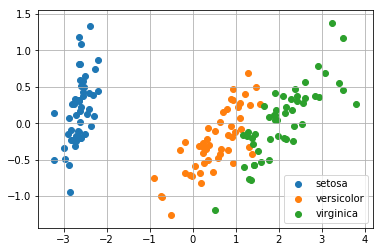

In [5]:
%%time

from sklearn.decomposition import PCA
X_embedded = PCA(n_components=2).fit_transform(iris_data.data)
draw_embeddings(X_embedded, iris_data.target, iris_data.target_names)

## MDS embedding

Wall time: 320 ms


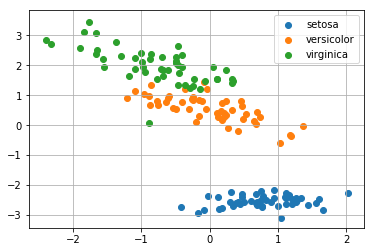

In [6]:
%%time

from sklearn.manifold import MDS
X_embedded = MDS(n_components=2).fit_transform(iris_data.data)
draw_embeddings(X_embedded, iris_data.target, iris_data.target_names)

## t-SNE embedding

Wall time: 901 ms


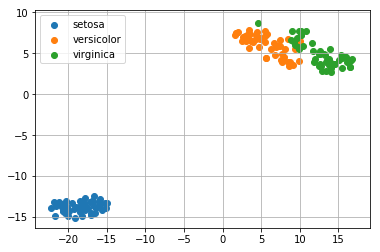

In [7]:
%%time

from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(iris_data.data)
draw_embeddings(X_embedded, iris_data.target, iris_data.target_names)

## Split dataset on Train and Test

In [8]:
from sklearn.model_selection import train_test_split

TEST_SPLIT_SIZE = 0.3 # ADJUST
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=TEST_SPLIT_SIZE)

## Function for accuracy calculation

In [9]:
def calc_accuracy(y_true, y_result):
    return sum(y_test == y_test_result) / len(y_test)

## K Nearest Neighbors (KNN)

In [10]:
%%time

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_test_result = knn.predict(X_test)

acc = calc_accuracy(y_test, y_test_result)
print('Test accuracy: {} %'.format(acc*100))

Test accuracy: 93.33333333333333 %
Wall time: 2.03 ms


## Logistic Regression

In [11]:
%%time

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear', multi_class='auto')
logreg.fit(X_train, y_train)
y_test_result = logreg.predict(X_test)

acc = calc_accuracy(y_test, y_test_result)
print('Test accuracy: {} %'.format(acc*100))

Test accuracy: 91.11111111111111 %
Wall time: 2.99 ms


## Support Vector Machine (SVM)

In [12]:
%%time

from sklearn.svm import SVC
svm = SVC(kernel='rbf', gamma='scale')
svm.fit(X_train, y_train)
y_test_result = svm.predict(X_test)

acc = calc_accuracy(y_test, y_test_result)
print('Test accuracy: {} %'.format(acc*100))

Test accuracy: 97.77777777777777 %
Wall time: 2.99 ms


## Random Forest

In [13]:
%%time

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10)
forest.fit(X_train, y_train)
y_test_result = forest.predict(X_test)

acc = calc_accuracy(y_test, y_test_result)
print('Test accuracy: {} %'.format(acc*100))

Test accuracy: 95.55555555555556 %
Wall time: 38.9 ms


## Gradient Boosting

In [14]:
%%time

from sklearn.ensemble import GradientBoostingClassifier
gboost = GradientBoostingClassifier(n_estimators=10, max_depth=10)
gboost.fit(X_train, y_train)
y_test_result = gboost.predict(X_test)

acc = calc_accuracy(y_test, y_test_result)
print('Test accuracy: {} %'.format(acc*100))

Test accuracy: 95.55555555555556 %
Wall time: 24.9 ms


## Test a model

In [15]:
sepal_length = 5.5
sepal_width = 2.3
petal_length = 4.2
petal_width = 1.2

my_features = np.array([[sepal_length, sepal_width, petal_length, petal_width]])

res = forest.predict(my_features)
print('Prediction: {}'.format(iris_data.target_names[res[0]]))

Prediction: versicolor


## Visualize embedding of my example

Wall time: 289 ms


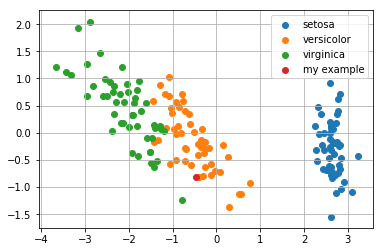

In [16]:
%%time

new_data = np.concatenate((iris_data.data, my_features), axis=0)
new_targets = np.concatenate((iris_data.target, np.array([3])))
new_target_names = np.concatenate((iris_data.target_names, ['my example']))

X_embedded = MDS(n_components=2).fit_transform(new_data)
draw_embeddings(X_embedded, new_targets, new_target_names)